# Check GPU


In [1]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

2024-03-03 14:36:50.050357: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-03 14:36:50.304138: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-03 14:36:50.304172: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-03 14:36:50.308133: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-03 14:36:50.372272: I tensorflow/core/platform/cpu_feature_guar

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
!nvidia-smi

Sun Mar  3 14:36:56 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 545.29.06              Driver Version: 551.61       CUDA Version: 12.4     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3050 ...    On  | 00000000:01:00.0 Off |                  N/A |
| N/A   57C    P0              12W /  61W |      0MiB /  4096MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# Imports


# General imports

In [3]:
import os
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread, imshow, subplots, show
%matplotlib inline

## Custom imports

In [4]:
from belote.models.model1.lib import Params, initialize_model, compile_model, train_model
from belote.models.helpers.lib import destroy_test_dir, create_test_dir, check_image_sizes, plot_history

# DATA folders

In [5]:
data_dir = os.environ.get('DATA_DIR')
train_dir = os.environ.get('TRAIN_DIR')
test_dir = os.environ.get('TEST_DIR')

In [6]:
test_dir

'/home/yjalil/code/ds1516projects/belote/data/test'

# Reset Test folder

In [7]:
destroy_test_dir(test_dir)

Test dataset merged to train successfully.


# Data checks and Splits

In [8]:
check_image_sizes(train_dir)

/home/yjalil/.pyenv/versions/3.11.5/envs/globalEnv/lib/python3.11/site-packages/PIL/TiffImagePlugin.py:868: UserWarning: Truncated File Read
  warnings.warn(str(msg))
/home/yjalil/.pyenv/versions/3.11.5/envs/globalEnv/lib/python3.11/site-packages/PIL/JpegImagePlugin.py:846: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  warnings.warn(


956 images have a different size


False

In [9]:
create_test_dir(train_dir, test_dir, 0.1)

Test dataset created successfully.


In [10]:
train_ds, val_ds = tf.keras.utils.image_dataset_from_directory(
  Path(train_dir),
  validation_split=0.2,
  subset="both",
  labels='inferred',
  label_mode='categorical',
  seed=123,
  batch_size=Params.BATCH_SIZE)

Found 2879 files belonging to 32 classes.
Using 2304 files for training.
Using 575 files for validation.


2024-03-03 14:36:58.718812: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-03 14:36:58.718906: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-03 14:36:58.718926: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-03 14:36:58.875442: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-03 14:36:58.875500: I external/local_xla/xla/stream_executor

In [11]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  Path(test_dir),
  labels='inferred',
  label_mode='categorical',
  batch_size=Params.BATCH_SIZE)

Found 320 files belonging to 32 classes.


# Data augmentation

In [12]:
model = initialize_model()

✅ Model initialized


In [13]:
compile_model(model)

✅ Model compiled


<Sequential name=sequential, built=False>

In [14]:
# train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
#         rescale=1./255,
#         shear_range=0.2,
#         zoom_range=0.2,
#         horizontal_flip=True)
# test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

trained_model, history = train_model(model, train_ds, val_ds)

Epoch 1/200


2024-03-03 14:37:05.257731: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fcd94010dd0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-03-03 14:37:05.257822: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2024-03-03 14:37:05.401915: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-03-03 14:37:05.841582: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904


 1/72 ━━━━━━━━━━━━━━━━━━━━ 15:41 13s/step - accuracy: 0.0625 - loss: 13.0336

I0000 00:00:1709473033.176923  207018 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


72/72 ━━━━━━━━━━━━━━━━━━━━ 34s 292ms/step - accuracy: 0.0319 - loss: 31.5334 - val_accuracy: 0.0261 - val_loss: 3.4626
Epoch 2/200
72/72 ━━━━━━━━━━━━━━━━━━━━ 19s 244ms/step - accuracy: 0.0408 - loss: 3.4514 - val_accuracy: 0.1287 - val_loss: 3.2983
Epoch 3/200
72/72 ━━━━━━━━━━━━━━━━━━━━ 22s 282ms/step - accuracy: 0.1486 - loss: 3.2078 - val_accuracy: 0.2122 - val_loss: 2.9112
Epoch 4/200
72/72 ━━━━━━━━━━━━━━━━━━━━ 22s 270ms/step - accuracy: 0.2743 - loss: 2.6337 - val_accuracy: 0.3061 - val_loss: 2.6420
Epoch 5/200
72/72 ━━━━━━━━━━━━━━━━━━━━ 22s 270ms/step - accuracy: 0.4129 - loss: 2.0185 - val_accuracy: 0.4087 - val_loss: 2.4260
Epoch 6/200
72/72 ━━━━━━━━━━━━━━━━━━━━ 20s 256ms/step - accuracy: 0.5290 - loss: 1.5972 - val_accuracy: 0.4104 - val_loss: 2.5165
Epoch 7/200
72/72 ━━━━━━━━━━━━━━━━━━━━ 20s 254ms/step - accuracy: 0.5978 - loss: 1.3303 - val_accuracy: 0.4417 - val_loss: 2.5062
Epoch 8/200
72/72 ━━━━━━━━━━━━━━━━━━━━ 20s 254ms/step - accuracy: 0.6566 - loss: 1.1037 - val_accurac

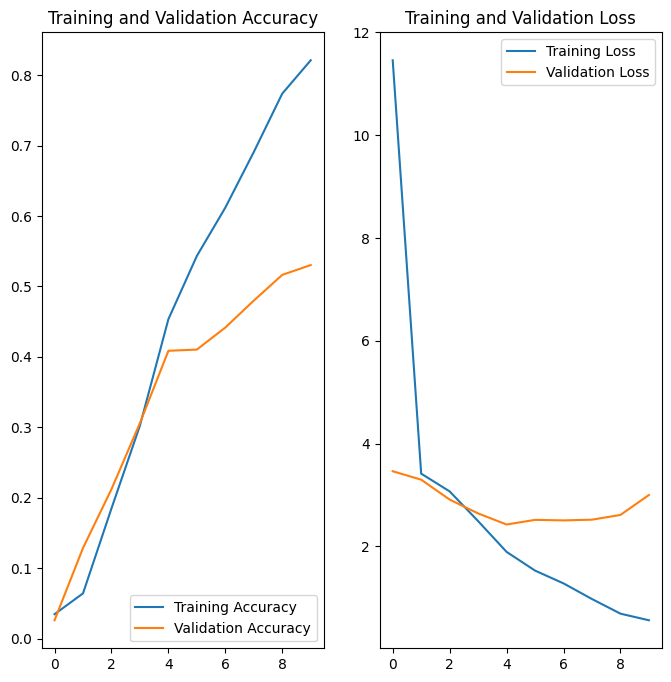

In [15]:
plot_history(history)

# Evaluation

In [16]:
result = trained_model.evaluate(test_ds)

10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.3580 - loss: 2.5872


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


/tmp/ipykernel_206890/379268562.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(test_ds.class_names[int(np.argmax(trained_model.predict(np.expand_dims(images[i], axis=0)), axis=1))] )


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


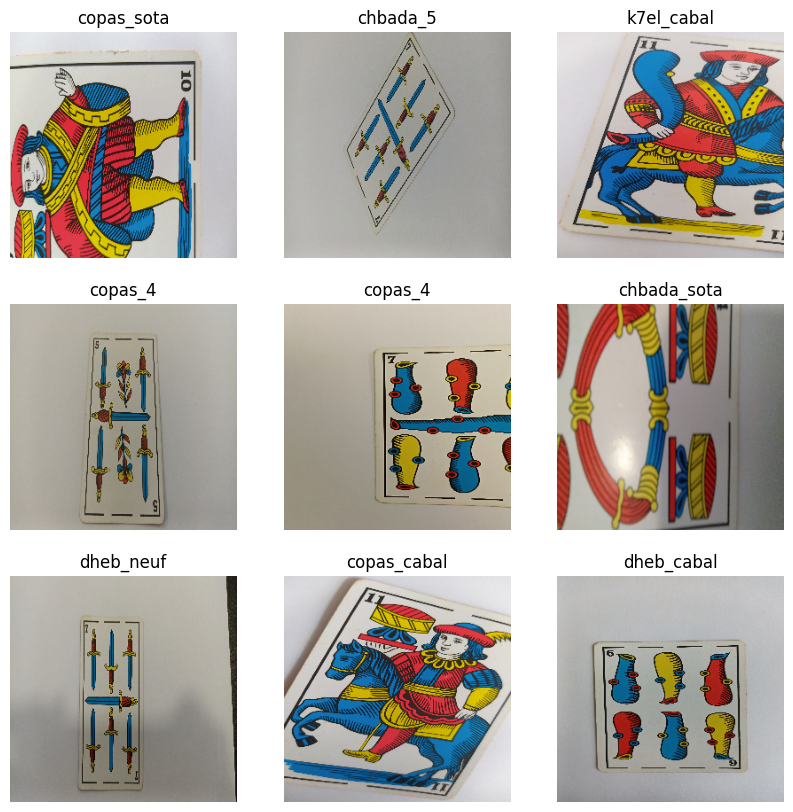

In [17]:
plt.figure(figsize=(10, 10))
for images, labels in test_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(test_ds.class_names[int(np.argmax(trained_model.predict(np.expand_dims(images[i], axis=0)), axis=1))] )
    plt.axis("off")


In [18]:
# Evaluate the model
loss, acc = trained_model.evaluate(test_ds, verbose=2)
print("Untrained data, accuracy: {:5.2f}%".format(100 * acc))

10/10 - 3s - 278ms/step - accuracy: 0.3625 - loss: 2.4431
Untrained data, accuracy: 36.25%


In [19]:
model.save('../models/model1/model1v2.keras')

FileNotFoundError: [Errno 2] No such file or directory: '../models/model1v2.keras'

# Loading test

In [ ]:
loaded_model = tf.keras.models.load_model('../models/modelv1.keras')

/home/yjalil/.pyenv/versions/3.11.5/envs/globalEnv/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 16 variables whereas the saved optimizer has 30 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


In [ ]:
# Evaluate the model
loss, acc = model.evaluate(test_ds, verbose=2)
print("Untrained data, accuracy: {:5.2f}%".format(100 * acc))

10/10 - 2s - 220ms/step - accuracy: 0.7031 - loss: 1.4241
Untrained model, accuracy: 70.31%
